# Regressão Linear Simples
Aqui aplicaremos um modelo de regressão linear simples

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Warning:
from yellowbrick.regressor import ResidualsPlot

In [8]:
base = pd.read_csv('./dados/cars.csv')
base.shape

(50, 3)

In [4]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [9]:
base.drop(['Unnamed: 0'], axis=1, inplace=True)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Definição de X e Y, sendo X (distância) variável independente e Y (velocidade) dependente.

In [11]:
x = base.iloc[:, 1].values
y = base.iloc[:, 0].values
print("X: ", x)
print("Y: ", y)

X:  [  2  10   4  22  16  10  18  26  34  17  28  14  20  24  28  26  34  34
  46  26  36  60  80  20  26  54  32  40  32  40  50  42  56  76  84  36
  46  68  32  48  52  56  64  66  54  70  92  93 120  85]
Y:  [ 4  4  7  7  8  9 10 10 10 11 11 12 12 12 12 13 13 13 13 14 14 14 14 15
 15 15 16 16 17 17 17 18 18 18 18 19 19 19 20 20 20 20 20 22 23 24 24 24
 24 25]


In [12]:
# Cálculo de correlação:
correlacao = np.corrcoef(x, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [30]:
# Formata uma matriz
x = x.reshape(-1, 1)
x[:5]

array([[ 2],
       [10],
       [ 4],
       [22],
       [16]])

Agora vamos criar o modelo e treiná-lo:

In [15]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

Visualização dos coeficientes:

In [16]:
# Interceptação
model.intercept_

8.283905641787172

In [17]:
# Inclinação
model.coef_

array([0.16556757])

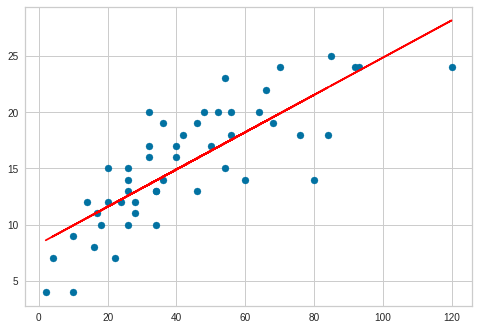

In [22]:
# Gráfico de Dispersão
plt.scatter(x, y)
# Adicionado à linha a esse gráfico de dispersão
plt.plot(x, model.predict(x), color='red') # Errado pois usa os mesmos modelos para prever

Agora vamos prever:

In [29]:
# Previsão via cálculo da distância de 22 usando a fórmula manual:
# inter * incli * dist
# Qual velocidade se levou 22 dist para parar?
model.intercept_ + model.coef_ * 22

array([11.92639228])

In [27]:
# Previsão usando sklearn
model.predict([[22]])

array([11.92639228])

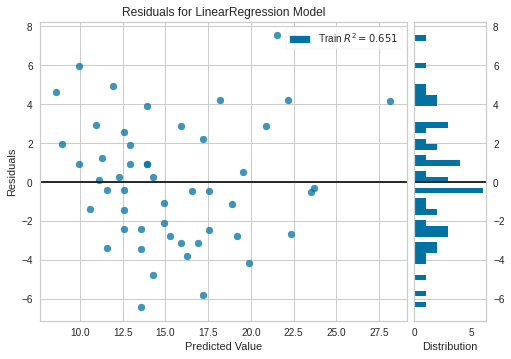

In [28]:
# Visualização dos resíduos:
visu = ResidualsPlot(model)
visu.fit(x, y)
visu.poof()